## SVM Reference from the following website
## http://python.astrotech.io/machine-learning/support-vector-machines.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

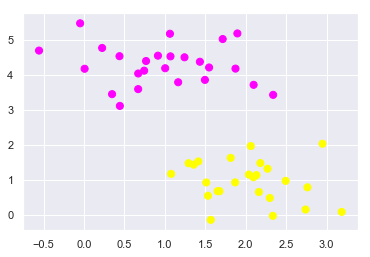

In [2]:
# data set
from sklearn.datasets.samples_generator import make_blobs
plt.figure()
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.show()


### A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example,  we could come up with several possibilities which perfectly discriminate between the classes in this example:

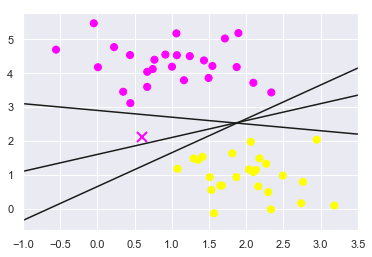

In [3]:
# so many different options to seperate
plt.figure()
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.plot([0.6], [2.1], 'x', color='magenta', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
plt.show()

### These are three very different separaters which perfectly discriminate between these samples. Depending on which you choose,  a new data point will be classified almost entirely differently! How can we improve on this?

### Maximizing the Margin  
### Notice here that if we want to maximize this width, the middle fit is clearly the best. This is the intuition of support vector machines, which optimize a linear discriminant model in conjunction with a margin representing the perpendicular distance between the datasets.

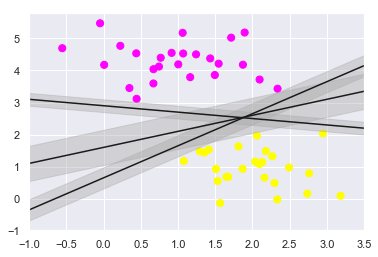

In [4]:
plt.figure()
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);


In [5]:
#Fitting a Support Vector Machine

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

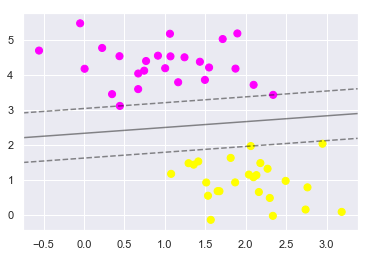

In [6]:
plt.figure()

from svmPlot import plot_svc_decision_function
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(model);

plt.show()

### Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known  as the support vectors (giving the algorithm its name). In scikit-learn, these are stored in the support vectors attribute of the classifier:

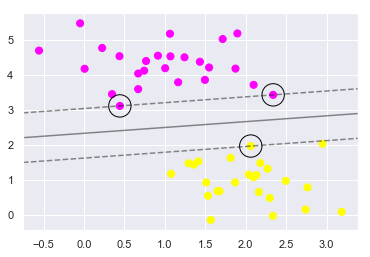

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


In [7]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=500, facecolors='none',edgecolors='black')
plt.show()

print(model.support_vectors_)

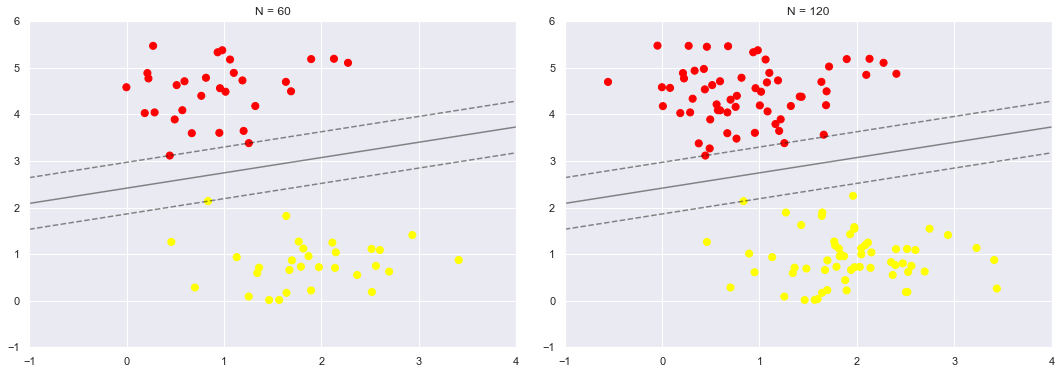

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

plt.show()

### Notice the unique thing about SVM is that only the support vectors matter:  that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!